<a href="https://colab.research.google.com/github/dslans/coursera-ai/blob/master/Wk2_mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictions Using the MNIST data set
Predicting articles of clothing using Neural Network Framework

## Importing Tensorflow and Fashion MNIST Dataset

In [2]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [0]:
mnist = tf.keras.datasets.fashion_mnist

Using load_data will give training and testing values and labels

In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Viewing the Images to see what the data looks like

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

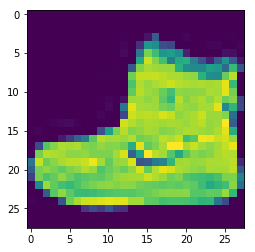

In [5]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

Normalize the values for the neural network. Pixel values are all between 0 and 255.

In [0]:
training_images = training_images / 255.0
test_images = test_images / 255.0

## Building the Model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]
)

W0825 14:39:26.579864 140293323265920 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Sequential:** Defines a sequence of layers in the network
**Flatten:** Turns the data into a 1-dimensional set
**Dense:** Adds a fully connected layer
**Relu:** If x>0 return x, else return 0. Only passes values 0 or greater to the next layer of the network.
**Softmax:** Takes a set of values (i.e. probabilities) and picks the best one.

## Building the Model
Compile the model and fit it with the training data

In [8]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4996 - acc: 0.8258
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3754 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3359 - acc: 0.8785
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3123 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2945 - acc: 0.8914


Try the model with unseen data

In [12]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.3389 - acc: 0.8791


[0.3388712717294693, 0.8791]

## Testing Model Alterations

In [15]:
# Adding another layer
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]
)
model2.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model2.fit(training_images, training_labels, epochs=5)
model2.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4743 - acc: 0.8307
Epoch 2/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3573 - acc: 0.8698
Epoch 3/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3217 - acc: 0.8819
Epoch 4/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2965 - acc: 0.8904
Epoch 5/5
10000/10000 [==============================] - 1s 60us/sample - loss: 0.3354 - acc: 0.8801


[0.335394571018219, 0.8801]

In [14]:
# Adding more epochs
# Adding another layer
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]
)
model3.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model3.fit(training_images, training_labels, epochs=50)
model3.evaluate(test_images, test_labels)

Epoch 1/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5027 - acc: 0.8235
Epoch 2/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3789 - acc: 0.8625
Epoch 3/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3404 - acc: 0.8751
Epoch 4/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3152 - acc: 0.8843
Epoch 5/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2984 - acc: 0.8893
Epoch 6/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2847 - acc: 0.8934
Epoch 7/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2692 - acc: 0.8992
Epoch 8/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2584 - acc: 0.9032
Epoch 9/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2486 - acc: 0.9074
Epoch 10/50
60000/60000 [==============================] - 4s 64us/sample - loss: 

[0.492916210308671, 0.8868]

In [16]:
# Without normalization
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.14.0
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1981
Epoch 2/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0811
Epoch 3/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0533
Epoch 4/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0379
Epoch 5/5
10000/10000 [==============================] - 1s 62us/sample - loss: 0.0681
[4.4411643e-09 1.0425157e-09 2.1901317e-07 9.8650389e-07 5.9627813e-13
 2.9937991e-10 7.4538493e-14 9.9999821e-01 7.5430197e-11 6.2232141e-07]
7


## Model callbacks
Callbacks are a way to stop the training once you have reached a desired training loss or accuracy

In [17]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training=True

callbacks = myCallback()


In [0]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [20]:
# compile using callbacks
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4720
Epoch 2/5
59808/60000 [============================>.] - ETA: 0s - loss: 0.3592
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3591
